In [14]:
from pymatgen import Structure
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer 
from pymatgen.phonon import bandstructure
from pymatgen.phonon.plotter import*
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.phonon import plotter
with MPRester("ZPSKgimujRNFyTRi") as m:
  
    phonon = m.get_phonon_bandstructure_by_material_id("mp-961687")

 # Détermination de la vitesse du son
La vitesse du son peut être calculée à l'aide de:  $\frac{\partial \omega}{\partial q}$ 
* $\omega$ est la relation de dispersion dans notre matériau 
* q est le vecteur d'onde


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

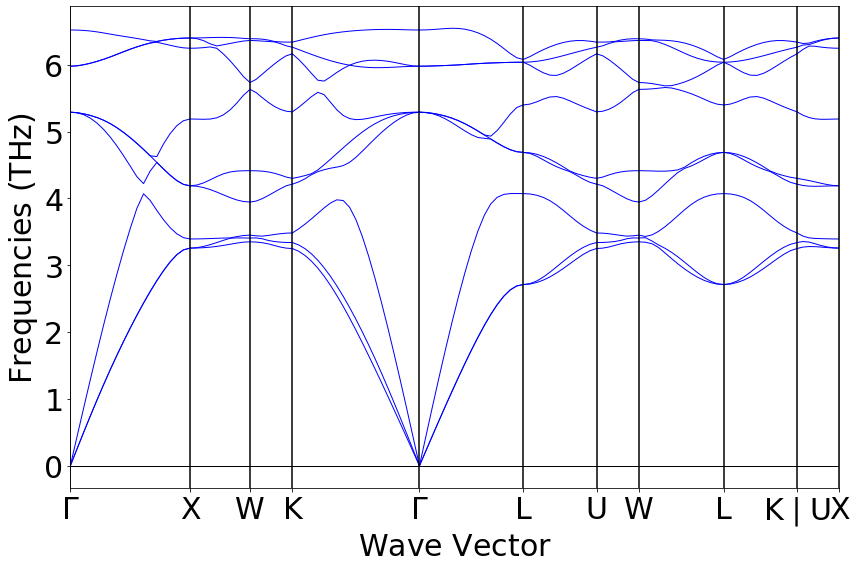

In [16]:
graph = PhononBSPlotter(phonon)
graph.get_plot()

zone de brillouin :


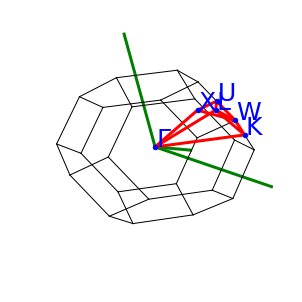

In [19]:
print("zone de brillouin :")
graph.plot_brillouin()

Vitesse du son (par approximation linéaire pour k petits) :  7.885863492539137 [m/s]
Vitesse du son (par approximation linéaire pour k petits) :  38.04195517987382 [m/s]
Vitesse du son (par approximation linéaire pour k petits) :  11.441257772884255 [m/s]


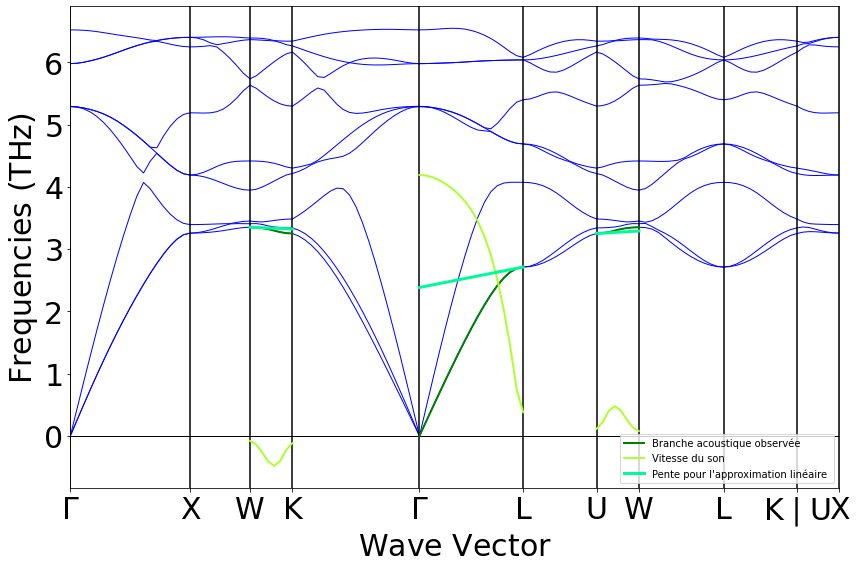

In [46]:
data = graph.bs_plot_data()
distances = data.get("distances")
frequences = data.get("frequency")

# courbes dans 3 directions différentes
courbes = []
courbes.append(frequences[2][0])
courbes.append(frequences[4][0])
courbes.append(frequences[6][0])

q = [0,0,0]
q[0] = distances[2]
q[1] = distances[4]
q[2] = distances[6]

deriv = [0,0,0]
dwdx = [0,0,0]
son = [0,0,0] 

for i in range(3) : 
    
    if i == 1 : 
        deriv[i] = np.gradient(courbes[i], q[i][1]-q[i][0])
        dwdx[i] = np.add(np.multiply(np.array(q[i]), np.array(deriv[i][-1])), 
                  np.add(-np.multiply(np.array(q[i][-1]), np.array(deriv[i][-1])), np.array(courbes[i][-1])))
        son[i] = np.abs(((dwdx[i][-1]-dwdx[i][0])*10**12)/((q[i][-1]-q[i][0])*10**10))
    else : 
        deriv[i] = np.gradient(courbes[i], q[i][1]-q[i][0])
        dwdx[i] = np.add(np.multiply(np.array(q[i]), np.array(deriv[i][0])), 
                  np.add(-np.multiply(np.array(q[i][0]), np.array(deriv[i][0])), np.array(courbes[i][0])))
        son[i] = np.abs(((dwdx[i][1]-dwdx[i][0])*10**12)/((q[i][1]-q[i][0])*10**10))

graph.get_plot()

for i in range(3):
    
    if i == 0 : 
        plt.plot(q[i], courbes[i], color= "green", linewidth = 2, label = "Branche acoustique observée")
        plt.plot(q[i], deriv[i], color= "greenyellow", linewidth = 2, label = "Vitesse du son")
        plt.plot(q[i], dwdx[i], color="mediumspringgreen", linewidth = 3, label = "Pente pour l'approximation linéaire ")
    else : 
        plt.plot(q[i], courbes[i], linewidth = 2, color= "green")
        plt.plot(q[i], deriv[i], linewidth = 2, color= "greenyellow")
        plt.plot(q[i], dwdx[i], linewidth = 3, color="mediumspringgreen")
    print("Vitesse du son (par approximation linéaire pour k petits) : ", son[i], "[m/s]")

plt.legend()
plt.show()

Les directions étudiées correspondent aux directions : 
* courbe 1 : W-K
* courbe 2 : $\Gamma$-L
* courbe 3 : U-W